In [1]:
# importing dependencies
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import os

In [31]:
#importing  the CliffWalking envirenment from gymnasium

env = gym.make('CliffWalking-v0', render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(20):
   action = env.action_space.sample() 
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
      observation, info = env.reset()

env.close()

In [27]:
q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 48 x 4 array
q.shape

(48, 4)

Episode 50/200 - Total Reward: -2233, Epsilon: 0.778
Episode 100/200 - Total Reward: -124, Epsilon: 0.606
Episode 150/200 - Total Reward: -46, Epsilon: 0.471
Episode 200/200 - Total Reward: -24, Epsilon: 0.367


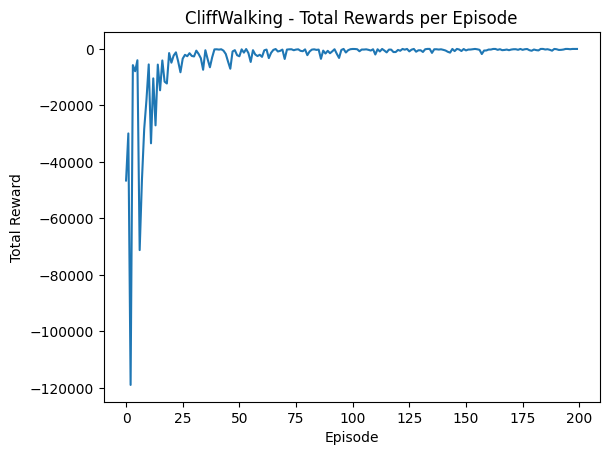

In [49]:
# Parameters
episodes = 500
learning_rate_a = 0.01
discount_factor_g = 0.99
epsilon = 1.0
epsilon_decay_rate = 0.995  # Slower decay rate for better exploration
min_epsilon = 0.01  # Prevent epsilon from reaching zero

# Initialize rewards tracking
rewards_per_episode = np.zeros(episodes)

# Initialize Q-table
env = gym.make('CliffWalking-v0')
q_table_path = 'CliffWalkingss.npy'
if os.path.exists(q_table_path):
    q = np.load(q_table_path)
else:
    q = np.zeros((env.observation_space.n, env.action_space.n))

rng = np.random.default_rng()

# Training loop
for i in range(episodes):
    state = env.reset()[0]  
    terminated = False      
    truncated = False       
    total_reward=0
    while not terminated and not truncated:
        # here we perform random action if epsilon larger than random number else we performe the model action
        if rng.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q[state, :])
        
        new_state,reward,terminated,truncated,_ = env.step(action)
        q[state, action] = q[state, action] + learning_rate_a * (
            reward + discount_factor_g * np.max(q[new_state, :]) - q[state, action]
        )
        state = new_state
        total_reward += reward

    # Store the total reward for the episode
    rewards_per_episode[i] = total_reward

    # Decay epsilon (exploration-exploitation tradeoff)
    epsilon = max(epsilon * epsilon_decay_rate, min_epsilon)

    # Print progress every 50 episodes
    if (i + 1) % 50 == 0:
        print(f"Episode {i+1}/{episodes} - Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

# Save the Q-table after training
np.save(q_table_path, q)

env.close()

plt.plot(rewards_per_episode)
plt.title('CliffWalking - Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.savefig('CliffWalking_optimized.png')
plt.show()


In [50]:
import gymnasium as gym
env = gym.make('CliffWalking-v0', render_mode="human")
observation, info = env.reset(seed=42)
#testing our model 
for _ in range(50):
   action= np.argmax(q[state,:])
   observation, reward, terminated, truncated, info = env.step(action)
   state= observation

   if terminated or truncated:
      observation, info = env.reset()

env.close()